# Plotting Graphs with Matplotlib 

*Estimated time to complete:* one hour.

## Introduction: Matplotlib and Pyplot

Numerical data is often presented with graphs, and the tools we use for this come from the module `matplotlib.pyplot` which is part of the Python *package* `matplotlib`. (A Python *package* is essentially a module that also contains other modules.)

## Sources on Matplotlib

Matplotlib is a huge collection of graphics tools, of which we see just a few here. For more information, the home site for Matplotlib is http://matplotlib.org
and the section on pyplot is at http://matplotlib.org/1.3.1/api/pyplot_api.html

However, another site that I find easier as an introduction is https://scipy-lectures.org/intro/matplotlib/

In fact, that whole site https://scipy-lectures.org/ is quite useful a a reference on Python, Numpy, and so on.

**Note:** the descriptions here are for now about working in notebooks: see the note below on [differences when using Spyder and IPython](#with-Spyder-IPython)

## Choosing where the graphs appear

In a notebook, we can choose between having the figures produced by Matplotlib appear "inline" (that is, within the notebook window) or in separate windows.
For now we will use the inline option, which is the default, but can also be specified explicitly with the command

    %matplotlib inline

To activate that, uncomment the line below;
that is, remove the leading hash character "#"

In [1]:
%matplotlib inline

This is an IPython *magic command*, indicated by starting with the percent character "%" — you can read more about them at
https://ipython.org/ipython-doc/dev/interactive/magics.html

Alternatively, one can have figures appear in separate windows, which might be useful when you want to save them to files, or zoom and pan around the image.
That can be chosen with the magic command

    %matplotlib tk

In [2]:
#%matplotlib tk

As far as I know, this magic works for Windows and Linux as well as Mac OS; let me know if it does not!

We need some Numpy stuff, for example to create arrays of numbers to plot.

Note that this is Numpy only: Python lists and tuples do not work for this, and nor do the versions of functions like `sin` from module `math`!

In [3]:
# Import a few favorites, and let them be known by their first names:
from numpy import linspace, sin, cos, pi

And for now, just the one main `matplotlib` graphics function, `plot`

In [4]:
from matplotlib.pyplot import plot

To access all of pyplot, add its common nickname `plt`:

In [5]:
import matplotlib.pyplot as plt

### Producing arrays of "x" values with the numpy function  `linspace`

To plot the graph of a function, we first need a collection of values for the abscissa (horizontal axis).
The function <code>linspace</code> gives an array containing a specified number of equally spaced values over a specified interval, so that

In [6]:
tenvalues = linspace(1., 7., 10)

gives ten equally spaced values ranging from 1 to 7:

In [7]:
print(f"Array 'tenvalues' is:\n{tenvalues}")

Array 'tenvalues' is:
[1.         1.66666667 2.33333333 3.         3.66666667 4.33333333
 5.         5.66666667 6.33333333 7.        ]


Not quite what you expected?  To get values with ten *intervals* in between them, you need 11 values:

In [8]:
tenintervals = linspace(1., 7., 11)
print(f"Array 'tenintervals' is: \n {tenintervals}")

Array 'tenintervals' is: 
 [1.  1.6 2.2 2.8 3.4 4.  4.6 5.2 5.8 6.4 7. ]


### Basic graphs with `plot`

We could use these 11 values to graph a function, but the result is a bit rough, because the given points are joined with straight line segments:

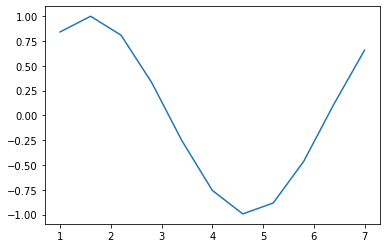

In [9]:
plot(tenintervals, sin(tenintervals))

Here we see the default behavior of joining the given points with straight lines.

*Aside:* That text output above the graph is a message returned as the output value of function `plot`; that is what happens when you execute a function but do not "use" its return value by either saving its result into a variable or making it input to another function.

You might want to suppress that, and that can be done by saving its `return` value into a variable (which you can then ignore).

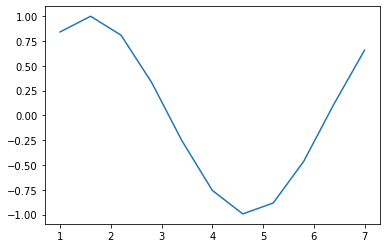

In [10]:
plotmessage = plot(tenintervals, sin(tenintervals))

(More on this output clean-up below.)

For discrete data it might be better to mark each point, unconnected.
This is done by adding a third argument, a text string specifying a marker, such as a star:

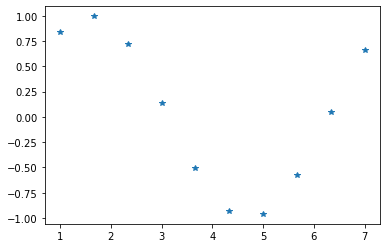

In [11]:
plotmessage = plot(tenvalues, sin(tenvalues), '*')

Or maybe both lines and markers:

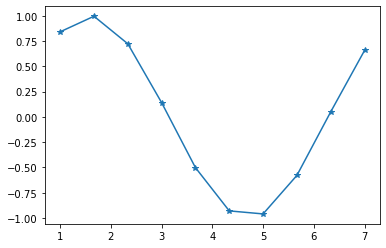

In [12]:
plotmessage = plot(tenvalues, sin(tenvalues), '-*')

## Smoother graphs

It turns out that 50 points is often a good choice for a smooth-looking curve, so the function <code>linspace</code> has this as a *default input parameter*: you can omit that third input value, and get 50 points.

Let's use this to plot some trig. functions.

In [13]:
x = linspace(-pi, pi)

In [14]:
print(x)

[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]


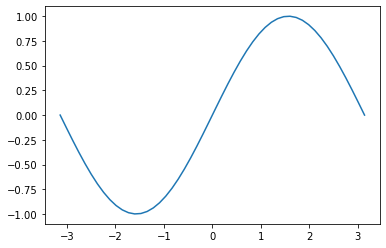

In [15]:
# With a line through the points
plotmessage = plot(x, sin(x), '-')

## Multiple curves on a single figure
As we have seen when using `plot` to produce inline figures in a Jupyter notebook, `plot` commands in different cells produce separate figures.

To combine curves on a single graph, one way is to use successive `plot` commands within the same cell:

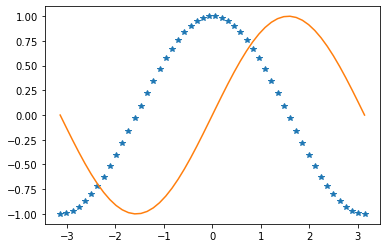

In [16]:
plot(x, cos(x), '*')
plotmessage = plot(x, sin(x))

On the other hand, when plotting externally, or from a Python script file or the IPython command line, successive `plot` commands keep adding to the same figure until you explicitly specify otherwise, with the function `figure` introduced below.

*Aside on message clean up: a Juypter cell only displays the output of the last function invoked in the cell (along with anything explicitly output with a `print` function), so I only needed to intercept the message from the last `plot` command.*

## Two curves with a single `plot` command

Several curves can be specified in a single `plot` command (which also works with external figure windows of course.)

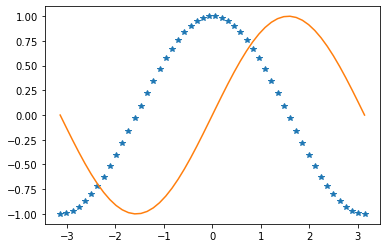

In [17]:
plotmessage = plot(x, cos(x), '*', x, sin(x))

Note that even with multiple curves in a single plot command, markers can be specified on some, none or all: Matplotlib uses the difference between an array and a text string to recognize which arguments specify markers instead of data.

Here are some other marker options — particularly useful if you need to print in back-and-white.

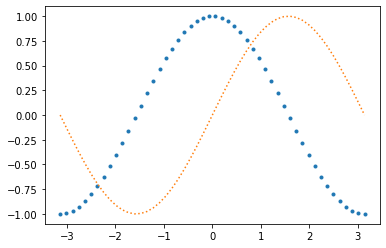

In [18]:
plotmessage = plot(x, cos(x), '.', x, sin(x), ':')

## Multiple curves in one figure

There can be any number of curves in a single `plot` command:

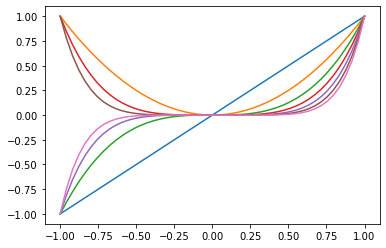

In [19]:
x = linspace(-1,1)
plotmessage = plot(x, x, x, x**2, x, x**3, x, x**4, x, x**5, x, x**6, x, x**7)

Note the color sequence.

With enough curves (more than ten? It depends on the version of matplotlib in use) the color sequence eventually repeats – but you probably don't want that many curves on one graph.

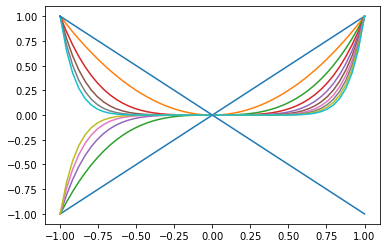

In [20]:
x = linspace(-1,1)
plotmessage = plot(x, x, x, x**2, x, x**3, x, x**4, x, x**5,
                x, x**6, x, x**7, x, x**8, x, x**9, x, x**10,
                x, -x)

**Aside on long lines of code:** *The above illustrates a little Python coding hack: one way to have a long command continue over several lines is simply to have parentheses wrapped around the part that spans multiple lines—when a line ends with an opening parenthesis not yet matched, Python knowns that something is still to come.*

<a name="with-Spyder-IPython"></a>
**Aside: using IPython magic commands in Spyder and with the IPython command line**

If using Spyder and the IPython command line, there is a similar choice of where graphs appear, but with a few differences to note:
- With the "inline" option (which is again the default) figures then appear in a pane within the Spyder window.
- The "tk" option works exactly as with notebooks, with each figure appearing in its own window.
- **Note:** Any such IPython magic commands must be entered at the IPython interactive command line, not in a Python code file.

## Plotting sequences

A curve can also be specified by a single array of numbers: these are taken as the values of a sequence, indexed Pythonically from zero, and plotted as the ordinates (vertical values):

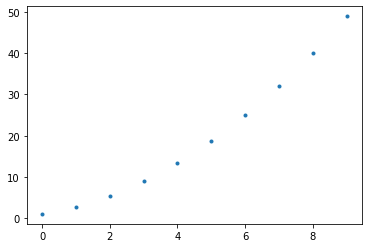

In [21]:
plotmessage = plot(tenvalues**2, '.')

## Plotting curves in separate figures (from a single cell)

From within a single Jupyter cell, or when working with Python files or in the IPython command window (as used within Spyder), successive `plot` commands keep adding to the previous figure.
To instead start the next `plot` in a separate figure, first create a new "empty" figure, with the function `matplotlib.pyplot.figure`.

With a full name as long as that, it is worth importing so that it can be used on a first name basis:

In [22]:
from matplotlib.pyplot import figure

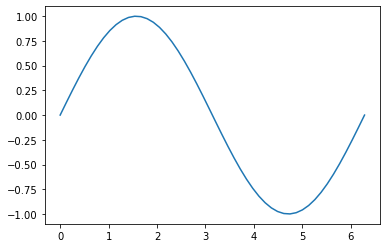

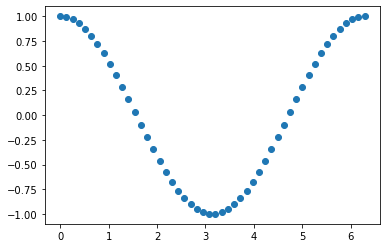

In [23]:
x = linspace(0, 2*pi)
plot(x, sin(x))
figure()
plotmessage = plot(x, cos(x), 'o')

The `figure` command can also do other things, like attach a name or number to a figure when it is displayed externally, and change from the default size.

So even though this is not always needed in a notebook, from now on each new figure will get an explicit `figure` command. Revisiting the last example:

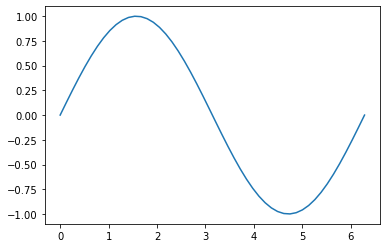

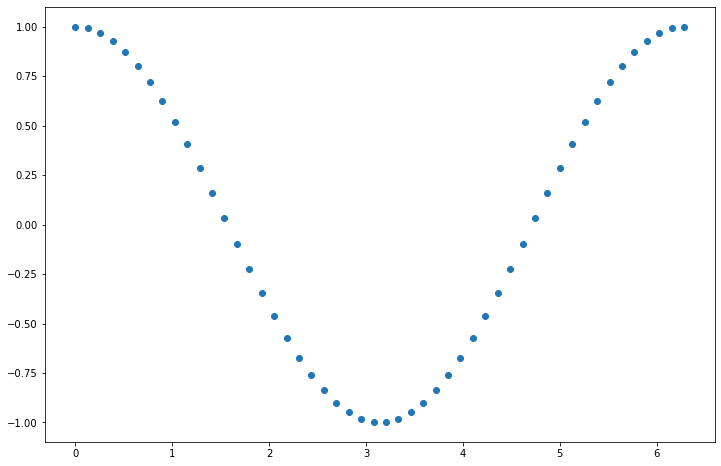

In [24]:
x = linspace(0, 2*pi)
figure(99)
# What does 99 do?
# See with external "tk" display of figures,
# as with `%matplotlib tk`
plot(x, sin(x))
figure(figsize=(12,8))
plotmessage = plot(x, cos(x), 'o')

## Decorating the Curves

Curves can be decorated in different ways.  We have already seen some options, and there are many more.
One can specify the color, line styles like dashed or dash-dot instead of solid, many different markers, and to have both markers and lines.
As seen above, this can be controlled by an optional text string argument after the arrays of data for a curve:

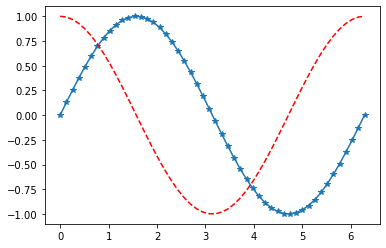

In [25]:
figure()
plot(x, sin(x), '*-')
plotmessage = plot(x, cos(x), 'r--')

These three-part curve specifications can be combined:
in the following, `plot` knows that there are two curves each specified by three arguments, not three curves each specified by just an "x-y" pair:

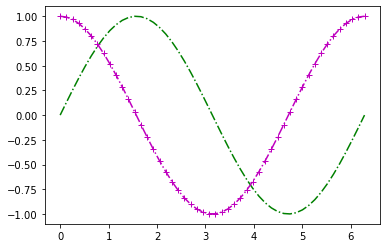

In [26]:
figure()
plotmessage = plot(x, sin(x), 'g-.', x, cos(x), 'm+-.')

<a name=Exercise-A></a>
#### Exercise A: Explore ways to refine your figures

There are many commands for refining the appearance of a figure after its initial creation with `plot`.
Experiment yourself with the commands `title`, `xlabel`, `ylabel`, `grid`, and `legend`.

Using the functions mentioned above, produce a refined version of the above sine and cosine graph, with:

- a *title* at the top
- *labels* on both axes
- a *legend* identifying each curve
- a *grid* or "graph paper" background, to make it easier to judge details like where a function has zeros.

<a name=Exercise-B></a>
#### Exercise B: Saving externally displayed figures to files

Then work out how to save this figure to a file (probably in format PNG), and turn that in, along with the file used to create it.

This ismost readily done with externally displayed figures; that is, with `%matplotlib tk`.
Making that change to `tk` in a notebook requires then restarting the kernel for it to take effect; use the menu *Kernel* above and select "Restart Kernel and Run All Cells ...*

For your own edification, explore other features of externally displayed figures, like zooming and panning: this cannot be done with inline figures.

### Getting help from the documentation

For some of these, you will probably need to read up. For simple things, there is a function `help`, which is best used in the IPython interactive input window (within Spyder for example), but I will illustrate it here.

The entry for `plot` is unusually long! It provides details about all the options mentioned above, like marker styles.
So this might be a good time to learn how to clear the output in a cell, to unclutter the view: either use the above menu "Edit* or open the menu with Control-click or right-click on the code cell; then use "Clear Outputs" to remove the output of just the current cell.

In [ ]:
help(plot)

The jargon used in `help` can be confusing at first; fortunately there are other online sources that are more readable and better illustrated, like http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html mentioned above.

However, that does not cover everything; the official pyplot documentation at http://matplotlib.org/1.3.1/api/pyplot_api.html is more complete: explore its search feature.

### P. S. A shortcut revealed: the IPython "magic" command pylab

So far I have encourage you to use explicit, specific import commands, because this is good practice when developing larger programs.
However, for quick interactive work in the IPython command window and Jupyter notebooks, there is a sometimes useful shortcut: the IPython "magic" command

    %pylab
adds everything from Numpy and the main parts of Matplotlib, including all the items imported above. (This creates the so-called **pylab** environment: that name combines "Python" with "Matlab", as its goal is to produce an environment very similar to Matlab.)

Note that such "magic" commands are part of the IPython interactive interface, not Python language commands, so they must be used either in a IPython notebook or in the IPython command window (within Spyder), not in a Python ".py" file.

However, there is a way to access magics in python scripts; the above can be achieved in such a file with:

    get_ipython().run_line_magic('pylab', '')
and the magic

    %matplotlib inline
is achieved with

    get_ipython().run_line_magic('matplotlib', 'inline')